<center><h1>Modelamiento - Identificación de Usuario</header1></center>

Presentado por: Carlos Lucio, Luis Olalla  <br>
Fecha: 12/08/2022

# Importación de librerias necesarias

In [10]:
#Para esta actividad se importarán las siguientes librerías:

#importar libreria opencv para procesar las imágenes
import cv2
#libreria de cálculos numéricos
import numpy as np
#libreria dependiente de sistema operativo
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
#Libreria de coleccion de archivos
import shutil
#libreria para devolver rutas de archivos
import glob
#Libreria pandas para analisis de datos
import pandas as pd
#Libreria para graficar los datos
import matplotlib.pyplot as plt
#Libreria seaborn para distribuciones aleatorias
import seaborn as sn
#Libreria  de código abierto para aprendizaje automático 
from tensorflow.keras.utils import img_to_array,  array_to_img, img_to_array, load_img
#Libreria de redes neuronales para generar imagen
from keras.preprocessing.image import ImageDataGenerator
#Libreria que permite editar imagenes
from  PIL  import Image
#Libreria para remover el fondo
from rembg import remove
#Libreria de tecnicas de aprendizaje automatico
from sklearn.preprocessing import MinMaxScaler
#Libreria que permite almacenar datos binarios
import h5py
#Libreria que permite retrasar la ejecucion
from time import sleep
#importar libreria pathlib
import pathlib
#libreria TF
import tensorflow as TF


## Cargar dataset

In [11]:
#Código para cargar el Dataset
direccion = pathlib.Path(r"C:\Users\Usuario\Documents\SEXTO\ASIGNATURAS\INTELIGENCIA ARTIFICIAL\TERCER PARCIAL\ProyectoIA\Dataset") #Direccion de la ruta principal
tamanio_lote = 16 #tamanio del lote
img_alto = 32 #alto de la imagen
img_ancho = 32 #ancho de la i
dsFotos = TF.keras.preprocessing.image_dataset_from_directory(
    direccion,label_mode="categorical")

Found 15 files belonging to 5 classes.


## Listar las clases del dataset

In [12]:
#Código para cargar el Dataset
#Ruta del dataset de las imagenes principales
images_path = "./Dataset"
#cargar la ruta del dataset
class_names = os.listdir(images_path)
#Ordenar los nombres de las clases
class_names.sort()
#imprimir los nombres de las clases
print(class_names)

['CevallosJoan', 'Jhon Zambrano', 'LucioCarlos', 'OlallaLuis', 'RivasSelena']


In [13]:
#for para recorrer el nombre de la clase
for class_name in class_names:
    #Seleccionar la ruta y el nombre de la clase
    cur_path = images_path + "/" + class_name
    #listar los elementos en la ruta actual
    elements = os.listdir(cur_path)
    
    #For para recorrer a los elementos 
    for element in elements:
        #Copiar las imagenes del dataset
        print("Copying Image - {} in Dataset/{}".format(element, class_name))
        #Especificar el origen de las iamgenes
        src = os.path.join(images_path + "/" + class_name, element) # origen
        #Destino de las imagenes copiadas
        dst = os.path.join("./Dataset_Aumentado/" + class_name, element) 
        #coleccionar cada archivo
        shutil.copy(src, dst)

Copying Image - L00376416_1.jpg in Dataset/CevallosJoan
Copying Image - L00376416_2.jpg in Dataset/CevallosJoan
Copying Image - L00376416_3.jpg in Dataset/CevallosJoan
Copying Image - L00392993_Centro.jpg in Dataset/Jhon Zambrano
Copying Image - L00392993_LD.jpg in Dataset/Jhon Zambrano
Copying Image - L00392993_LI.jpg in Dataset/Jhon Zambrano
Copying Image - L00393009_1.jpg in Dataset/LucioCarlos
Copying Image - L00393009_2.jpg in Dataset/LucioCarlos
Copying Image - L00393009_3.jpg in Dataset/LucioCarlos
Copying Image - L00393001_1.jpg in Dataset/OlallaLuis
Copying Image - L00393001_2.jpg in Dataset/OlallaLuis
Copying Image - L00393001_3.jpg in Dataset/OlallaLuis
Copying Image - L00376689_1.jpg in Dataset/RivasSelena
Copying Image - L00376689_2.jpg in Dataset/RivasSelena
Copying Image - L00376689_3.jpg in Dataset/RivasSelena


# **Aumento de datos**

In [14]:
#Generador de aumento de imagenes
datagen = ImageDataGenerator(
    #rotacion del rango de imagen
        rotation_range=40,
    #Desplazamiento ancho de rango
        width_shift_range=0.2,
    #Rango desplazamiento altura
        height_shift_range=0.2,
    #Reescalar
        rescale=1./255,
    #Rango de corte
        shear_range=0.2,
    #Rango de enfoque
        zoom_range=0.4,
    #Volteo horizontal
        horizontal_flip=True,
    #Modo de llenado
        fill_mode='nearest')

**CLASE CEVALLOS JOAN**

In [15]:
#Ruta de la clase Joan Cevallos
os.chdir(r"C:\Users\Usuario\Documents\SEXTO\ASIGNATURAS\INTELIGENCIA ARTIFICIAL\TERCER PARCIAL\ProyectoIA\Dataset_Aumentado\CevallosJoan")
#For para listar la ruta y cargar las imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    #Colocar array de las imgenes
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    #remodelar las imagenes
    x = x.reshape((1,) + x.shape)
    i = 0
    #For para agregar un lote en la imagen
    for batch in datagen.flow(x, batch_size=1,
        #Guardar en el directorio
            save_to_dir=".", 
        #colocar prefijo de la clase
            save_prefix= 'CevallosJoan', 
        #formato de guardado
            save_format='jpg'):
        #contador de imagenes
        i += 1
        #Contador del numero de imagenes
        if i == 9:     ## creates 10 image form 1 image 
            break 

**CLASE RIVAS SELENA**

In [16]:
os.chdir(r"C:\Users\Usuario\Documents\SEXTO\ASIGNATURAS\INTELIGENCIA ARTIFICIAL\TERCER PARCIAL\ProyectoIA\Dataset_Aumentado\RivasSelena")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'RivasSelena', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break 

**CLASE JHON ZAMBRANO**

In [17]:
os.chdir(r"C:\Users\Usuario\Documents\SEXTO\ASIGNATURAS\INTELIGENCIA ARTIFICIAL\TERCER PARCIAL\ProyectoIA\Dataset_Aumentado\Jhon Zambrano")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Jhon Zambrano', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break 

**CLASE LUCIO CARLOS**

In [18]:
os.chdir(r"C:\Users\Usuario\Documents\SEXTO\ASIGNATURAS\INTELIGENCIA ARTIFICIAL\TERCER PARCIAL\ProyectoIA\Dataset_Aumentado\LucioCarlos")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'LucioCarlos', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break 

**CLASE OLALLA LUIS**

In [19]:
os.chdir(r"C:\Users\Usuario\Documents\SEXTO\ASIGNATURAS\INTELIGENCIA ARTIFICIAL\TERCER PARCIAL\ProyectoIA\Dataset_Aumentado\OlallaLuis")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'OlallaLuis', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break 

# **Filtro NLM para eliminación de ruido de imagen**

In [20]:
os.chdir(r"C:\Users\Usuario\Documents\SEXTO\ASIGNATURAS\INTELIGENCIA ARTIFICIAL\TERCER PARCIAL\ProyectoIA")
images_path = "./Dataset_Aumentado"
class_names = os.listdir(images_path)
class_names.sort()
print(class_names)

['CevallosJoan', 'Jhon Zambrano', 'LucioCarlos', 'OlallaLuis', 'RivasSelena']


In [21]:
for class_name in class_names:
    cur_path = images_path + "/" + class_name
    cur_label = class_name
    i = 1

    for file in glob.glob(cur_path + "/*"):
        print("Processing Image - {} in {}".format(i, cur_label))
        # read the images path
        image = cv2.imread(file)
        # denoising images
        dst = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
        b,g,r = cv2.split(dst)
        rgb_dst = cv2.merge([r,g,b])
        # save images
        save_path = './Dataset_Aumentado_SinRuido/'+ cur_label
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.jpg'),
                    cv2.cvtColor(rgb_dst,cv2.COLOR_RGB2BGR))
        

        # show loop update
        i += 1

Processing Image - 1 in CevallosJoan
Processing Image - 2 in CevallosJoan
Processing Image - 3 in CevallosJoan
Processing Image - 4 in CevallosJoan
Processing Image - 5 in CevallosJoan
Processing Image - 6 in CevallosJoan
Processing Image - 7 in CevallosJoan
Processing Image - 8 in CevallosJoan
Processing Image - 9 in CevallosJoan
Processing Image - 10 in CevallosJoan
Processing Image - 11 in CevallosJoan
Processing Image - 12 in CevallosJoan
Processing Image - 13 in CevallosJoan
Processing Image - 14 in CevallosJoan
Processing Image - 15 in CevallosJoan
Processing Image - 16 in CevallosJoan
Processing Image - 17 in CevallosJoan
Processing Image - 18 in CevallosJoan
Processing Image - 19 in CevallosJoan
Processing Image - 20 in CevallosJoan
Processing Image - 21 in CevallosJoan
Processing Image - 22 in CevallosJoan
Processing Image - 23 in CevallosJoan
Processing Image - 24 in CevallosJoan
Processing Image - 25 in CevallosJoan
Processing Image - 26 in CevallosJoan
Processing Image - 27

# **Eliminación de fondo**

In [22]:
images_path = "./Dataset_Aumentado_SinRuido"
class_names = os.listdir(images_path)
class_names.sort()
print(class_names)

['CevallosJoan', 'Jhon Zambrano', 'LucioCarlos', 'OlallaLuis', 'RivasSelena']


In [23]:
for class_name in class_names:
    cur_path = images_path + "/" + class_name
    cur_label = class_name
    i = 1

    for file in glob.glob(cur_path + "/*"):
        print("Processing Image - {} in {}".format(i, cur_label))
        # read the images path
        image = cv2.imread(file)
        # remove bg 
        output = remove(image)
        # save images
        save_path = './Dataset_Aumentado_SinFondo/'+ cur_label
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.png'), output)
        

        # show loop update
        i += 1

Processing Image - 1 in CevallosJoan
Processing Image - 2 in CevallosJoan
Processing Image - 3 in CevallosJoan
Processing Image - 4 in CevallosJoan
Processing Image - 5 in CevallosJoan
Processing Image - 6 in CevallosJoan
Processing Image - 7 in CevallosJoan
Processing Image - 8 in CevallosJoan
Processing Image - 9 in CevallosJoan
Processing Image - 10 in CevallosJoan
Processing Image - 11 in CevallosJoan
Processing Image - 12 in CevallosJoan
Processing Image - 13 in CevallosJoan
Processing Image - 14 in CevallosJoan
Processing Image - 15 in CevallosJoan
Processing Image - 16 in CevallosJoan
Processing Image - 17 in CevallosJoan
Processing Image - 18 in CevallosJoan
Processing Image - 19 in CevallosJoan
Processing Image - 20 in CevallosJoan
Processing Image - 21 in CevallosJoan
Processing Image - 22 in CevallosJoan
Processing Image - 23 in CevallosJoan
Processing Image - 24 in CevallosJoan
Processing Image - 25 in CevallosJoan
Processing Image - 26 in CevallosJoan
Processing Image - 27

## Segunda parte Modelo

In [24]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Data loading and exploration

Haga una descripción de la fuente de dayos utilizada (Incluya los enlaces necesarios).

In [25]:
fpath = './Dataset_Aumentado_SinFondo'
random_seed = 9

categories = os.listdir(fpath)
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['CevallosJoan', 'Jhon Zambrano', 'LucioCarlos', 'OlallaLuis', 'RivasSelena'] 

No. of categories =  5


In [33]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            img_lst.append(np.array(img_array))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  149 
No. of labels loaded =  149
<class 'list'> <class 'list'>


In [35]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (149, 192, 192, 3) 
Labels shape =  (149,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


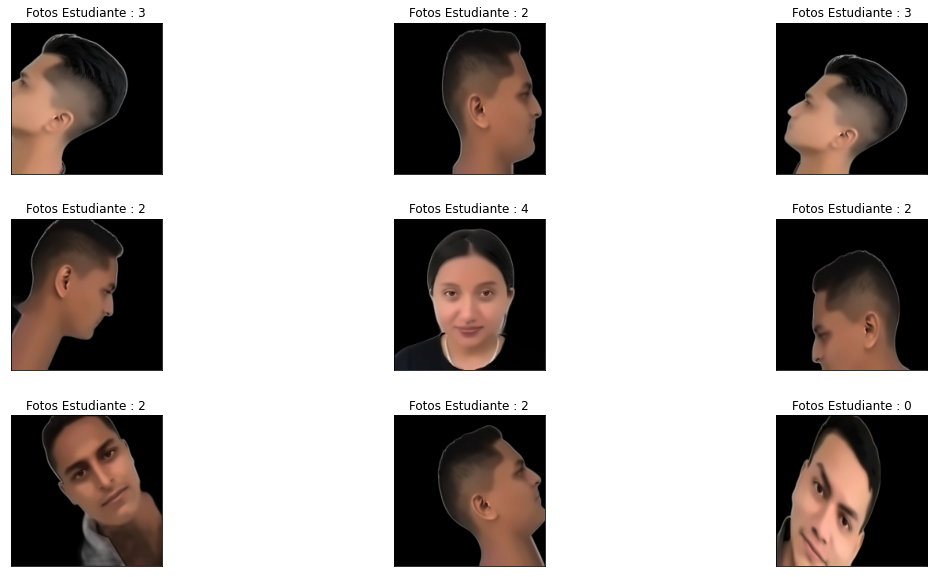

In [41]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Fotos Estudiante : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

## Prepare data for training the CNN model

In [42]:
#1-step in data shuffling

#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148]

'n' values after shuffling =  [ 76  89 135 103 123  37  26   3 107   9  25  70  97  90  39  80  31 139
 100  47  28  27 110  20  53  75  43  69   8  85  98 127  23  88  78  81
  55  45 118   7  17 111  60  44 102  67   6  68  35  73 116  51  10 132
 109 143 136  79  21 133  38   2  83 115  11  57 147 121  95  96  36  32
 131  87  14 106  82 105  94  48  84  86

In [43]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (149, 192, 192, 3) 
Labels shape after shuffling =  (149,)


In [44]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (149, 192, 192, 3)


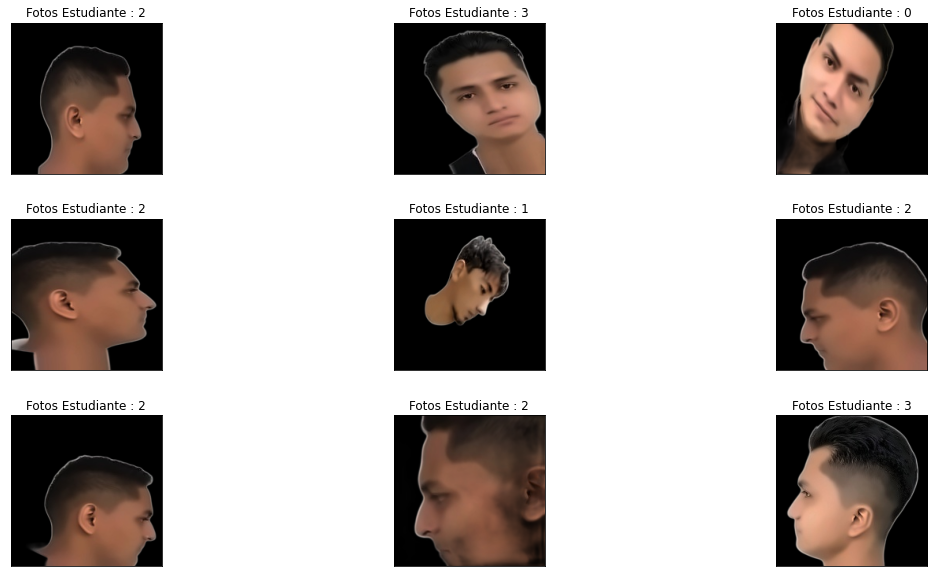

In [45]:
display_rand_images(images, labels)

In [46]:
train_ds, test_ds, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("train_ds shape = ",train_ds.shape)
print("train_labels shape = ",train_labels.shape)
print("\ntest_ds shape = ",test_ds.shape)
print("test_labels shape = ",test_labels.shape)

train_ds shape =  (119, 192, 192, 3)
train_labels shape =  (119,)

test_ds shape =  (30, 192, 192, 3)
test_labels shape =  (30,)


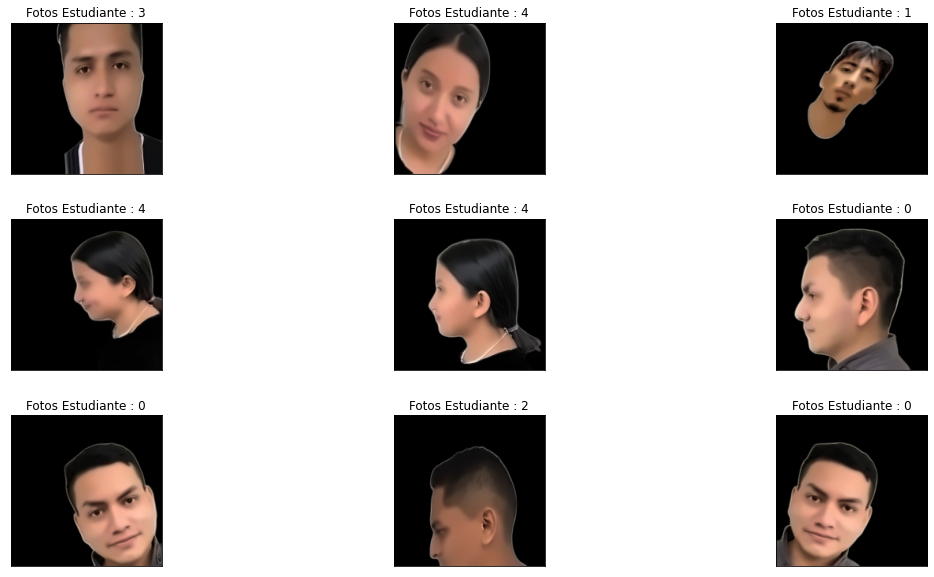

In [47]:
display_rand_images(train_ds, train_labels)

In [48]:
## Resizing images
train_ds = tf.image.resize(train_ds, (150, 150))
test_ds = tf.image.resize(test_ds, (150, 150))

## Explique el problema a resolver. 
Descripción del problema. Tipo de problema (justifique). Variable objetivo, variables de entrada. Utilidad de su posible solución. Elementos adicionales que considere relevantes (no son necesarios contenidos teóricos, sino explicar qué relaciones tratas de comprobar y con qué métodos).

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


In [ ]:
#Código que responde a la descripción anterior

En un par de párrafos haga un resumen de los principales hallazagos encontrados:    

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [ ]:
#Transformación de las caracteristicas (mire el apartado Feature engineering del aula virtual)


## División del dataset en datos de entrenamiento y datos de test 

In [ ]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.


## Modelamiento

In [ ]:
#Códo del modelo

In [ ]:
#Entrenamiento

In [ ]:
#Test

## Evaluación del Modelo

Construya un o dos párrafos con los principales hallazgos. Cómo está funcionando el modelo? Calidad en los resultados de predicción. 